In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("wages.csv")

In [55]:
df_male_races = df[df.facet.str.contains('demographics: (white|black|hispanic) male')]
df_female_races = df[df.facet.str.contains('demographics: (white|black|hispanic) female')]

C:\Users\timon\AppData\Local\Temp\ipykernel_22596\550458530.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_male_races = df[df.facet.str.contains('demographics: (white|black|hispanic) male')]
C:\Users\timon\AppData\Local\Temp\ipykernel_22596\550458530.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_female_races = df[df.facet.str.contains('demographics: (white|black|hispanic) female')]


,year,sample_size,wage,at_cap,union_wage,nonunion_wage,union_wage_premium_raw,union_wage_premium_adjusted,facet
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df_male_white = df[df.facet.str.contains('demographics: (white|black|hispanic) male')]
df_male_black = df[df.facet.str.contains('demographics: black male')]
df_male_hispanic = df[df.facet.str.contains('demographics: hispanic male')]

df_female_white = df[df.facet.str.contains('demographics: white female')]
df_female_black = df[df.facet.str.contains('demographics: black female')]
df_female_hispanic = df[df.facet.str.contains('demographics: hispanic female')]

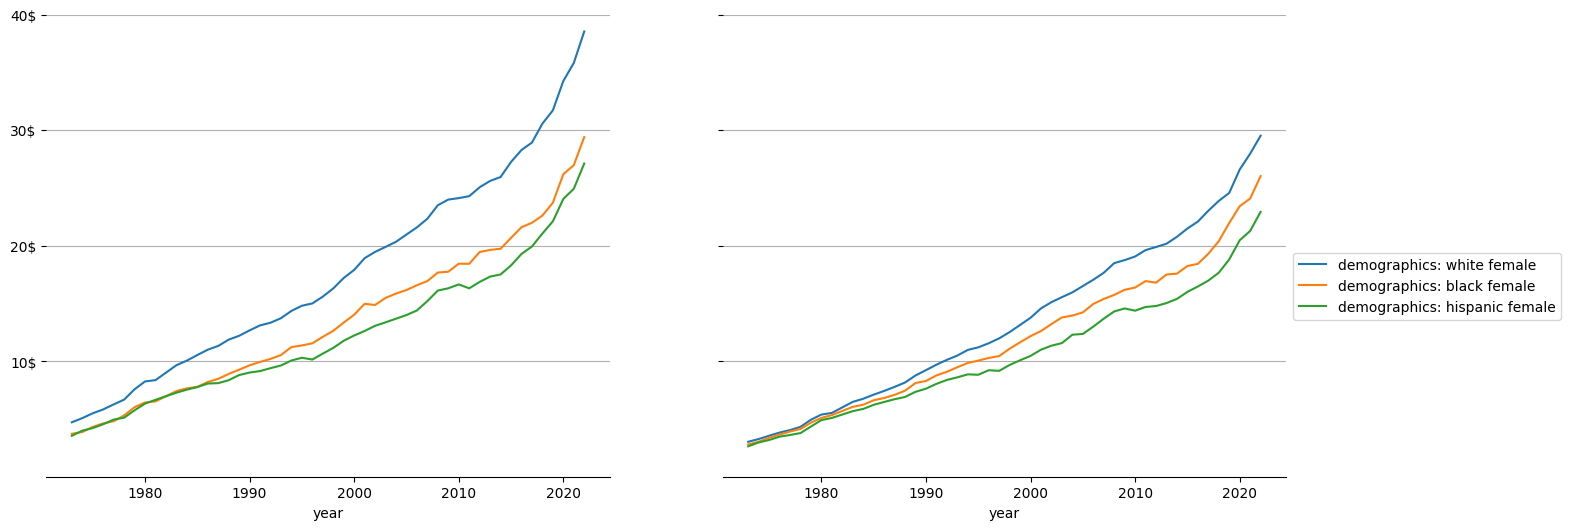

In [103]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6))

sns.lineplot(x=df_male_races.year,
             y=df_male_races.wage,
             data=df_male_races,
             ax=ax1,
             hue="facet",
             legend=False)
sns.lineplot(x=df_female_races.year,
             y=df_female_races.wage, 
             data=df_female_races,
             ax=ax2,
             hue="facet")

yticks = [10, 20, 30, 40]
ylabels = map(lambda x: str(x) + '$', yticks)  

ax1.set_ylim([0, 40])  
ax1.set_yticks(ticks=yticks, labels=ylabels)
ax1.set_ylabel('')
ax2.set_ylim(ax1.get_ylim())
ax2.set_yticks(ticks=yticks, labels=ylabels)
ax2.set_ylabel('')

ax1.spines.top.set_visible(False)
ax1.spines.left.set_visible(False)
ax1.spines.right.set_visible(False)
ax2.spines.top.set_visible(False)
ax2.spines.left.set_visible(False)
ax2.spines.right.set_visible(False)

ax1.grid(axis='y')
ax2.grid(axis='y')

handles, labels = ax.get_legend_handles_labels()
l = ax2.legend(handles=handles, labels=['white', 'black', 'hispanic'], bbox_to_anchor=(1,0.5), loc='upper left')